# Tarea 1 Ciencia de redes

> Integrantes: Thamara López y Fabián Ortega

Juntense en grupos de no más de 4 personas. Tienen una semana para entregar esta tarea. Para ambos datasets `example_1.txt` y `example_2.txt`. Cada grupo deberá cargar el edge list que corresponde y hacer lo siguiente:

* Pregunta 1: Calcula todas las medidas básicas que se muestran arriba. Comente ¿Qué se puede sospechar acerca de la distribución de grados de la red solo en función de la media y los grados extremos?

* Pregunta 2: Graficar la distribución del grado en escala log-log. También graficarlo en escala lineal. Comente cómo encaja esto con el análisis de la pregunta 1.

* Pregunta 3: Dibuje la red utilizando los dos algoritmos de diseño que se muestran arriba. ¿Cómo se refljan en la apariencia de la red los hallazgos de las preguntas 1 y 2?

*Nota: Recuerden que SU interpretación de los resultados es lo más importante.*

In [2]:
import pandas as pd 
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt

Cargamos redes

In [3]:
G1 = nx.read_edgelist('./example_1.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

G2 = nx.read_edgelist('./example_2.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

## Pregunta 1

### Calcula todas las medidas básicas que se muestran arriba. Comente ¿Qué se puede sospechar acerca de la distribución de grados de la red solo en función de la media y los grados extremos?

### Dataset 1

In [21]:
N = len(G1)
L = G1.size()
degrees1 = list(dict(G1.degree()).values())
kmin1 = min(degrees1)
kmax1 = max(degrees1)
media = np.mean(degrees1)
print(f"La red tiene en un grado promedio de {media} enlaces, con un grado mímino de {kmin1} y un grado máximo de {kmax1}")

La red tiene en un grado promedio de 5.982 enlaces, con un grado mímino de 3 y un grado máximo de 98


R: Tanto la mediana (4) como el promedio (5.982) de los grados de la red es cercano a su grado mínimo (3), por lo que se puede sospechar que la distribución de grados de la red es asimétrica a la izquierda (asimétrica positiva) y con una cola extensa, pues el grado máximo es 98. Por lo que tenemos indicios de que pudiese ser una red libre de escala. 

### Dataset 2

In [8]:
N = len(G2)
L = G2.size()
degrees2 = list(dict(G2.degree()).values())
kmin2 = min(degrees2)
kmax2 = max(degrees2)
media = np.mean(degrees2)
mediana = np.median(degrees2)
print(f"La red tiene en un grado promedio de {media}, con un grado mímino de {kmin2} enlaces y un grado máximo de {kmax2} enlaces, asi como una mediana de {mediana}")

La red tiene en un grado promedio de 16.761421319796955, con un grado mímino de 1 enlaces y un grado máximo de 43 enlaces, asi como una mediana de 21.0


R: La red tiene en un grado promedio de 16.761421319796955, con un grado mímino de 1 enlaces y un grado máximo de 43 enlaces, asi como una mediana de 21.0
Por lo que podemos sospechar que la distribución de la red es más similar a una red aleatoria. Levemente asimétrica negativa, ya que la mediana se encuentra a la derecha de la media.  

## Pregunta 2: Graficar la distribución del grado en escala log-log. También graficarlo en escala lineal. Comente cómo encaja esto con el análisis de la pregunta 1.

### dataset 1

In [11]:
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin1), np.log10(kmax1), num=20)

# histograma de la data para esos bines
density, _ = np.histogram(degrees1, bins=bin_edges, density=True)
bin_edges
np.histogram(degrees1, bins=bin_edges, density=True)

(array([6.86838846e-01, 2.56229996e-01, 1.12370775e-01, 7.34900083e-02,
        3.89263716e-02, 3.83518316e-02, 1.04573583e-02, 1.78666557e-02,
        3.81319429e-03, 3.49133797e-03, 3.17022966e-03, 1.97907504e-03,
        7.32133056e-04, 9.14095450e-04, 3.80427431e-04, 2.11101266e-04,
        0.00000000e+00, 0.00000000e+00, 1.21736737e-04]),
 array([ 3.        ,  3.60421743,  4.33012775,  5.20224063,  6.25000212,
         7.50878885,  9.02110254, 10.83800499, 13.02084215, 15.6433154 ,
        18.79396998, 22.57918471, 27.12676367, 32.59025144, 39.15411739,
        47.03998407, 56.51411011, 67.89638016, 81.57110552, 98.        ]))

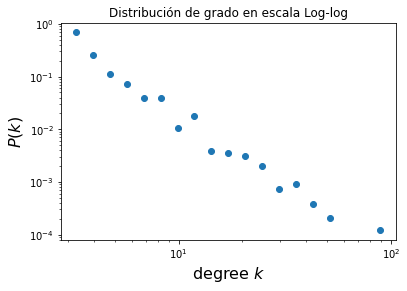

In [13]:
fig = plt.figure(figsize=(6,4))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.title('Distribución de grado en escala Log-log')
plt.show()

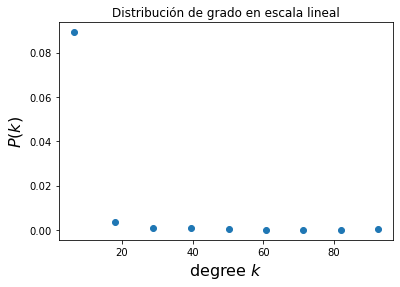

In [14]:
# Entrega 20 bins linealmente espaceados entre kmin y kmax
bin_edges = np.linspace(kmin1, kmax1, num=10)

# histograma de la data en estos bines 
density, _ = np.histogram(degrees1, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" debería ser el punto meido (en escala lineal) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.title('Distribución de grado en escala lineal')

# Muestra la gráfica
plt.show()

R:  De la red del dataset 1 se puede ver que se distrubuye efectivamente como una red libre de escala tanto para su distribución de grado log-log como lineal, por lo que lo inferido en la pregunta uno es correcto. Esta relacionado con la pregunta 1 porque en una red libre de escala la mayoría de los nodos tiene un grado bajo, y muy pocos nodos tienen grado bajos, lo que se puede inferir al ver sus rangos máximos, media, mediana.

### Dataset 2

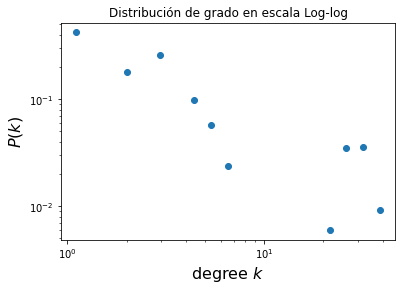

In [15]:
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin2), np.log10(kmax2), num=20)

# histograma de la data para esos bines
density, _ = np.histogram(degrees2, bins=bin_edges, density=True)
bin_edges
np.histogram(degrees2, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.title('Distribución de grado en escala Log-log')
plt.show()

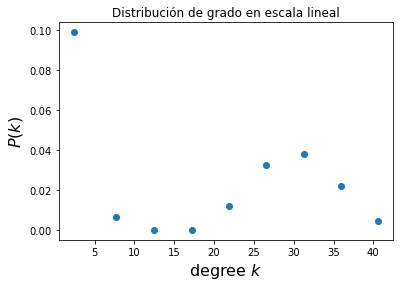

In [16]:
# Entrega 20 bins linealmente espaceados entre kmin y kmax
bin_edges = np.linspace(kmin2, kmax2, num=10)

# histograma de la data en estos bines 
density, _ = np.histogram(degrees2, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" debería ser el punto meido (en escala lineal) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.title('Distribución de grado en escala lineal')

# Muestra la gráfica
plt.show()

R: Al igual que en la red anterior, está se asemeja más a una red aleatoria. Lo que coincide con lo comentado en la pregunta 1. Esto se puede inferir también por las características de la distribución de los grados de la red, como la media y mediana. 

## Pregunta 3: Dibuje la red utilizando los dos algoritmos de diseño que se muestran arriba. ¿Cómo se refljan en la apariencia de la red los hallazgos de las preguntas 1 y 2?

### Dataset 1

* Usando el algoritmo force-based o "spring" 

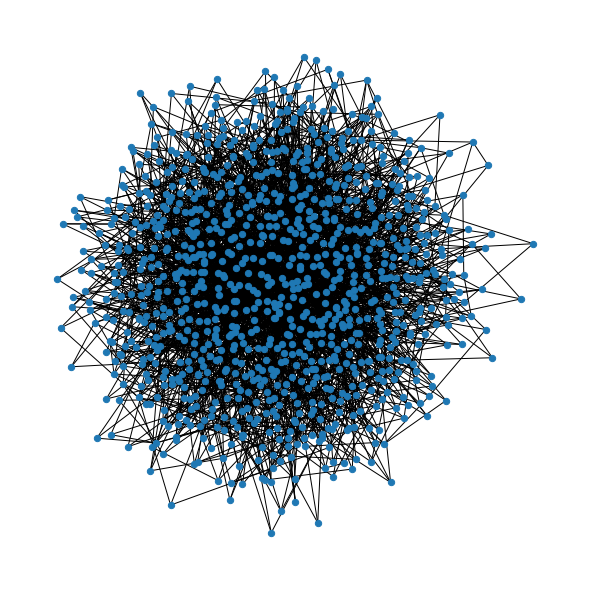

In [17]:
# G1 
fig = plt.figure(figsize=(8,8))
nx.draw_spring(G1, node_size=40)

* usando el algoritmo circular 

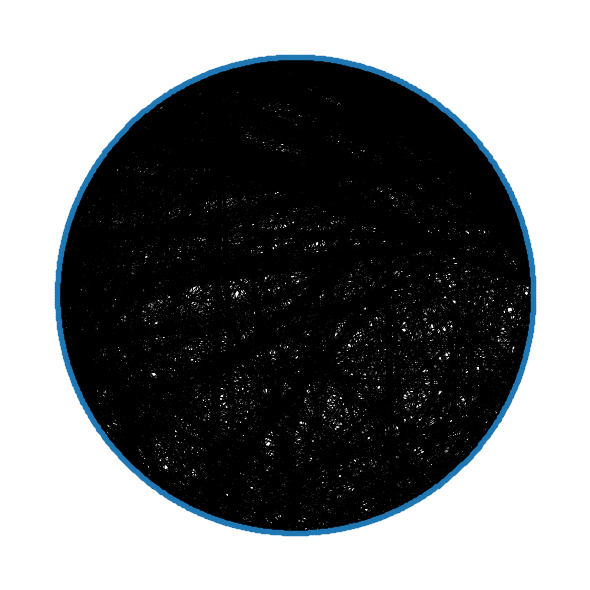

In [18]:
fig = plt.figure(figsize=(8,8))
nx.draw_circular(G1, node_size=20)

R: La red se puede visualizar de mejor manera con el algoritmo force-based. Es propio de una red libre de escala que la mayoría de los nodos tengan pocos enlaces, pero al ser una red grande, es díficil de visualizar y de comprender sus características.

### Dataset 2

* Usando force-based

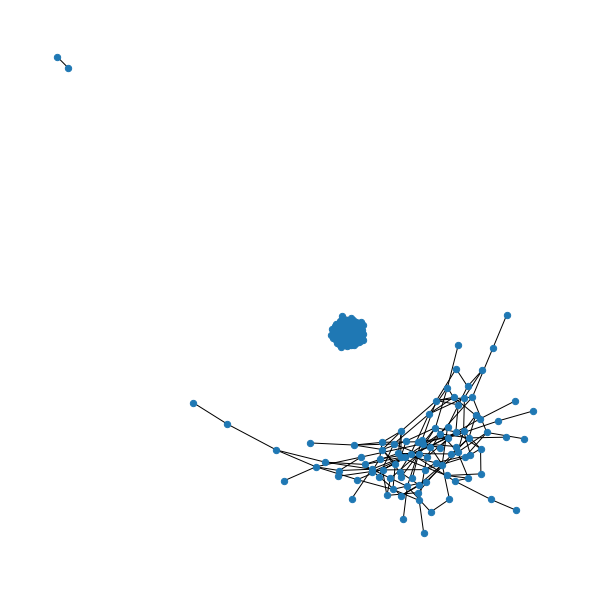

In [19]:
# G2
fig = plt.figure(figsize=(8,8))
nx.draw_spring(G2, node_size=40)

* usando algoritmo circular

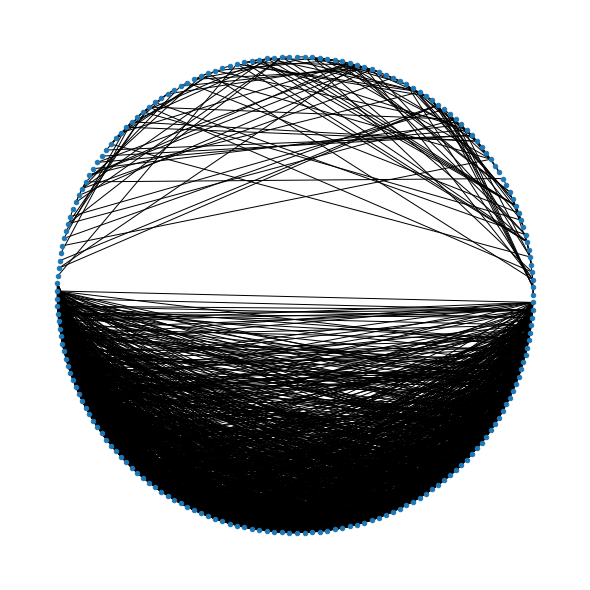

In [23]:
fig = plt.figure(figsize=(8,8))
nx.draw_circular(G2, node_size=20)

R: Es más sencillo ver la red con el algoritmo force-based, y al ser de un menor tamaño que la red del dataset 1, permite que se pueda realizar un mayor analisis visual de los nodos y sus enlaces. Por ejemplo, se aprecia que hay 2 grupos de nodos que no estan interconectados entre si, además de 2 nodos conectados entre sí pero no con el resto de la red. 